# Preprocessing and data exploration

First, import the pandas package in order to load the csv file as a dataframe, then rename the columns for easier processing purposes. You can consult the original header name through the header dictionary. 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = pd.DataFrame.from_csv('ODI-2019-csv.csv', header=0, sep=';', index_col=0, parse_dates=True)

C:\Users\marvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [3]:
columns_df = list(df.columns) 

In [4]:
columns_df

['What programme are you in?',
 'Have you taken a course on machine learning?',
 'Have you taken a course on information retrieval?',
 'Have you taken a course on statistics?',
 'Have you taken a course on databases?',
 'What is your gender?',
 'Chocolate makes you.....',
 'When is your birthday (date)?',
 'Number of neighbors sitting around you?',
 'Did you stand up?',
 'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
 'Give a random number',
 'Time you went to be Yesterday',
 'What makes a good day for you (1)?',
 'What makes a good day for you (2)?',
 'What is your stress level (0-100)?']

In [5]:
header_dict = {}
for i in range(len(columns_df)):
    header_dict[i] = columns_df[i]
header_dict
    

{0: 'What programme are you in?',
 1: 'Have you taken a course on machine learning?',
 2: 'Have you taken a course on information retrieval?',
 3: 'Have you taken a course on statistics?',
 4: 'Have you taken a course on databases?',
 5: 'What is your gender?',
 6: 'Chocolate makes you.....',
 7: 'When is your birthday (date)?',
 8: 'Number of neighbors sitting around you?',
 9: 'Did you stand up?',
 10: 'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
 11: 'Give a random number',
 12: 'Time you went to be Yesterday',
 13: 'What makes a good day for you (1)?',
 14: 'What makes a good day for you (2)?',
 15: 'What is your stress level (0-100)?'}

In [6]:
df.columns = range(len(columns_df))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Timestamp,,,,,,,,,,,,,,,,
2019-03-27 10:16:11,AI,yes,1,mu,ja,unknown,slim,unknown,3,no,100,6,23:00,sun,lecture,NaN
2019-04-01 15:58:21,AI,no,0,mu,ja,male,fat,09071992,1,no,0,7,3,DM,AI,1
2019-04-01 15:59:07,Computer Science,yes,1,unknown,ja,male,neither,04/08/95,0,unknown,0,0,0,0,0,100
2019-04-01 15:59:30,Econometrics,yes,1,mu,ja,male,fat,29-09-1993,2,no,42,"1,645","0,3",Winning,Food,0
2019-04-01 15:59:58,cs,no,1,mu,ja,male,neither,0212,2,no,second,66,20,kiss,love,100


Pie chart of male-female ratio

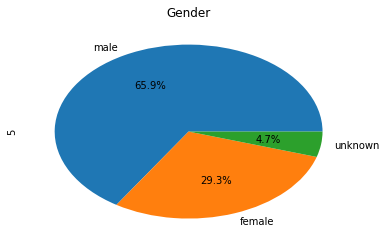

In [7]:
df[5].value_counts().plot(y = "test", kind = 'pie', title = 'Gender',autopct='%1.1f%%')

Pie chart of the answers to the question 'Have you taken a course in Machine Learning before'

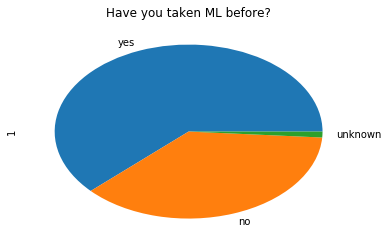

In [8]:
df[1].value_counts().plot(kind = 'pie', title = 'Have you taken ML before?')

Pie chart of the answers to the question 'Have you taken a course on Information Retrieval before'

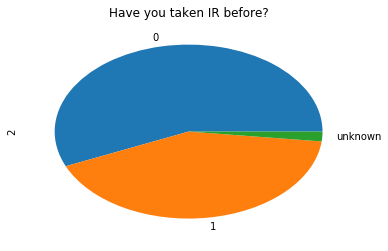

In [9]:
df[2].value_counts().plot(kind = 'pie', title = 'Have you taken IR before?')

Pie chart of the answers to the question 'Have you taken a course on Statistics before'

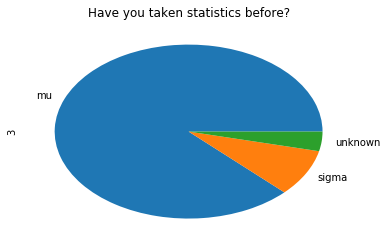

In [10]:
df[3].value_counts().plot(kind = 'pie', title = 'Have you taken statistics before?')

Pie chart of the answers to the question 'Have you taken a course on Databases before'

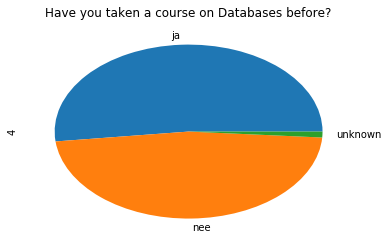

In [11]:
df[4].value_counts().plot(kind = 'pie', title = 'Have you taken a course on Databases before?')

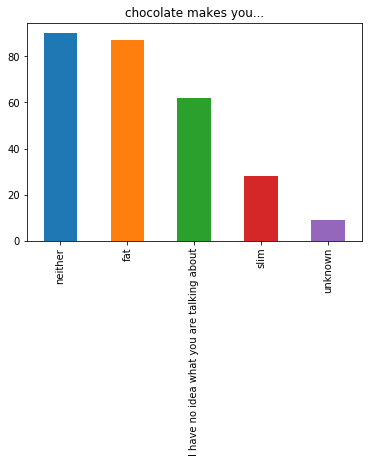

In [12]:
df[6].value_counts().plot(kind = 'bar', title = 'chocolate makes you...')

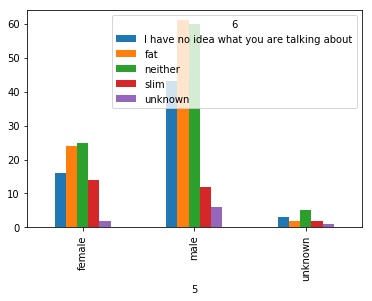

In [13]:
df.groupby([5])[6].value_counts().unstack().plot(kind='bar')

Number of neighbours sitting around you: top 10

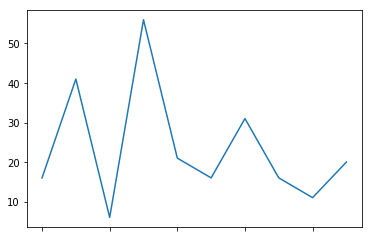

In [14]:
df[8].value_counts()[:10].sort_index().plot()

Give a random numbr top 10

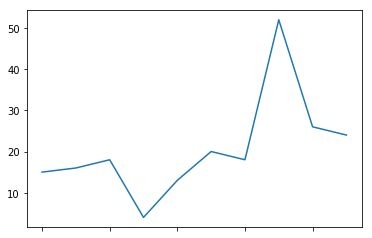

In [15]:
df[11].value_counts()[:10].sort_index().plot()

Did you stand up?

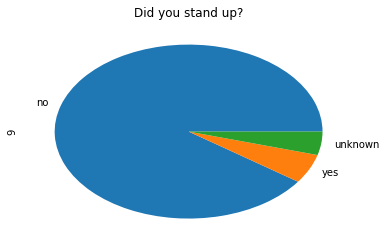

In [16]:
df[9].value_counts().plot(kind='pie', title = 'Did you stand up?')

What is your stress level?

In [17]:
boolean_list = []
for stresslevel in df[15]:
    try:
        if 0 < int(stresslevel) and int(stresslevel) < 100:
            boolean_list.append(True)
        else:
            boolean_list.append(False)
    except:
        boolean_list.append(False)

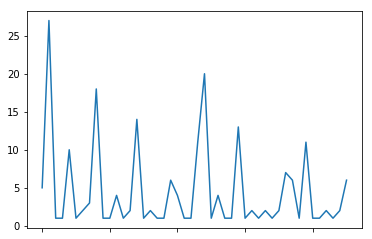

In [18]:
df[boolean_list][15].value_counts().sort_index().plot()

In [19]:
#df[0].unique()

In [20]:
ai = ["ai","artificial intelligence"]
ai_answer = []
ai_indices = []

ai_counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in ai:
        if synonym in name.lower():
            ai_counter += 1
            ai_indices.append(i)
            df[0][i] = "AI"
            if name not in ai_answer:
                ai_answer.append(name)
                print(name)
            break
print(ai_counter)  
print(ai_indices)

AI
master AI
Artificial Intelligence
M AI
MSc Artificial Intelligence 
MSc Artificial Intelligence: Cognitive Science
MSc Artificial Intelligence
Ai
Artificial intelligence
Artificial Intelligence Master
UvA AI
ai
75
[0, 1, 5, 9, 12, 21, 22, 23, 24, 26, 39, 43, 50, 51, 53, 59, 61, 65, 67, 74, 76, 77, 78, 79, 81, 84, 86, 92, 100, 104, 107, 108, 109, 110, 113, 116, 118, 119, 123, 128, 136, 140, 141, 143, 145, 148, 150, 153, 156, 159, 163, 165, 168, 173, 178, 182, 186, 189, 194, 195, 197, 198, 200, 203, 205, 208, 218, 222, 242, 247, 251, 258, 265, 273, 275]


In [21]:
cs = ["cs","computer science","master computer science","cs (exchange)","mscs","computer science"]

cs_answer = []
cs_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in cs:
        #if synonym == name.lower() or "computer science" in name.lower():
        if synonym == name.lower() or "computer science" in name.lower():
            counter += 1
            cs_indices.append(i)
            df[0][i] = "Computer science"
            if name not in cs_answer:
                cs_answer.append(name)
                print(name)
            break
print(counter) 
print(cs_indices)

Computer Science
cs
CS
MsCS
MSc Computer Science (Big Data Engineering)
Computer Science (joint degree)
Master Computer Science
computer science
CS (Exchange)
Computer Science - internet and web technologies
Computer Science Big Data Engineering Master
Computer science masters
Computer Science 
33
[2, 4, 35, 45, 49, 52, 57, 60, 66, 111, 117, 126, 138, 155, 158, 174, 188, 199, 207, 213, 216, 225, 230, 232, 250, 252, 254, 255, 257, 261, 263, 266, 272]


In [22]:
#BA 41

ba = ['ba','analytics']
ba_answer = []
ba_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in ba:
        if synonym in name.lower(): # and not "mba" in name.lower():
            counter += 1
            df[0][i] = "Business Analytics"
            ba_indices.append(i)
            if name not in ba_answer:
                ba_answer.append(name)
                print(name)
            break
print(counter) 
print(ba_indices)

Business Analytics
BA
Business Analytics 
Business Analytics and Data Science
mBA
42
[13, 14, 17, 19, 29, 38, 42, 58, 63, 68, 73, 87, 91, 94, 95, 96, 97, 99, 102, 106, 115, 124, 131, 142, 151, 154, 175, 192, 201, 211, 214, 215, 217, 224, 226, 238, 240, 243, 245, 264, 270, 271]


In [23]:
#econometrics 15

ecom = ['econometrics',"eor",'econometrivs']
ecom_answer = []
ecom_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in ecom:
        if synonym in name.lower(): #and not "financial" in name.lower():
            counter += 1
            df[0][i] = "Econometrics"
            ecom_indices.append(i)
            if name not in ecom_answer:
                ecom_answer.append(name)
                print(name)
            break
print(counter) 
print(ecom_indices)

Econometrics
EOR
Financial Econometrics
Financial Econometrics 
Master Econometrics & OR
Econometrics and Operations Research
Masters EOR
Econometrics 
Master Econometrics
Financial econometrivs
20
[3, 15, 16, 37, 54, 55, 82, 98, 101, 132, 137, 157, 185, 190, 193, 210, 227, 229, 239, 246]


In [24]:
#bioinformatics 31

bio = ['bioinformatics','bio','informatic']
bio_answer = []
bio_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in bio:
        if synonym in name.lower()and not "medical" in name.lower():
            counter += 1
            df[0][i] = "Bioinformatics"
            bio_indices.append(i)
            if name not in bio_answer:
                bio_answer.append(name)
                print(name)
            break
print(counter) 
print(bio_indices)

MSc Bioinformatics & Systems Biology
Bioinformatics and Systems biology
Bioinformatics
Master of Bioinformatics and system biology
Bioinformatics and Systems Biology
Bioinformatics and System biology
Bioinformatics and Systems Biology MsC
BioSB
M bioinformatics
Bioinformatics and Systems Biology 
Bioinf
bioinformatics 
MSc Bioinformatic
Msc Bioinformatics
Boinformatics
Bioinformatics & Systems Biology
Bioinformatics and Systems Biology Master's
Bioinformatics and Biology Systems
Bioinformatics and systems biology 
31
[6, 7, 10, 18, 20, 25, 28, 32, 36, 41, 46, 64, 71, 89, 90, 121, 133, 134, 146, 162, 166, 167, 170, 179, 180, 187, 196, 209, 236, 241, 260]


In [25]:
#qrm

qrm = ["qrm","quantitative risk management"]
qrm_answer = []
qrm_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in qrm:
        if synonym in name.lower() :
            counter += 1
            df[0][i] = "QRM"
            qrm_indices.append(i)
            if name not in qrm_answer:
                qrm_answer.append(name)
                print(name)
print(counter) 
print(qrm_indices)

Quantitative Risk Management 
QRM
MSc QRM (DHP)
Quantitative Risk Management
Duisenberg QRM
DHPQRM
11
[33, 34, 88, 120, 152, 160, 176, 181, 206, 220, 237]


In [26]:
#computational science

com = ['computational science',"cls"]
com_answer = []
com_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in com:
        if synonym in name.lower() :
            counter += 1
            df[0][i] = "Computational science"
            com_indices.append(i)
            if name not in com_answer:
                com_answer.append(name)
                print(name)
print(counter) 
print(com_indices)

CLS
Computational Science
Computational Science 
Computational science 
Computational science
Computational Science joint degree
CLSJD
MSc Computational Science
Cls
30
[8, 11, 27, 40, 44, 48, 75, 85, 112, 114, 127, 129, 130, 147, 149, 161, 169, 172, 177, 184, 191, 234, 235, 249, 253, 256, 259, 262, 268, 269]


In [27]:
#data science

ds = ['data science','ds']
ds_answer = []
ds_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in ds:
        if synonym in name.lower(): #and not "analytics" in name.lower() and not "information" in name.lower():
            counter += 1
            df[0][i] = "Data science"
            ds_indices.append(i)
            if name not in ds_answer:
                ds_answer.append(name)
                print(name)
print(counter) 
print(ds_indices)

MA Data Science (UvA)
UvA MSc Information Studies: Data Science
DS
UvA: Information Systems - Data Science
UvA Master Information Studies, Track Data Science
Information Studies: Data Science (UvA)
6
[31, 47, 139, 221, 223, 244]


In [28]:
#information sciences

ins = ['information']
ins_answer = []
ins_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in ins:
        if synonym in name.lower(): #and not "analytics" in name.lower() and not "information" in name.lower():
            counter += 1
            df[0][i] = "Information science"
            ins_indices.append(i)
            if name not in ins_answer:
                ins_answer.append(name)
                print(name)
print(counter) 
print(ins_indices)

Information sciences 
information sciences 
2
[183, 228]


In [29]:
#Business administration

ins = ['business']
ins_answer = []
ins_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in ins:
        if synonym in name.lower() and not "analytics" in name.lower(): #and not "analytics" in name.lower() and not "information" in name.lower():
            counter += 1
            df[0][i] = "Business Administration"
            ins_indices.append(i)
            if name not in ins_answer:
                ins_answer.append(name)
                print(name)
print(counter) 
print(ins_indices)

Master Digital Business and Innovation
DBI Digital Business and Innovation
Digital Business & Innovation
Business Administration
Business Administration: Digital Business & Innovation
8
[56, 72, 103, 105, 125, 135, 204, 267]


In [30]:
df[0].value_counts()
#f.loc[df[5] == "male"]
#plt.scatter(df[0],df[5])
#plt.scatter(male.stature, male.span, color='blue');
#plt.xlabel('height (m)')
#plt.ylabel('span (m)');

#print('mean           ', female.stature.mean())
#print('std dev.       ', female.stature.std())
#print('median         ', female.stature.median())
#print('standard error ', female.stature.sem())
#people = pd.concat([male, female])
#people = people.sample(frac=1)
#gender_cat = people.Gender.astype('category')
#people.Gender.cat.codes

AI                                                                                    75
Business Analytics                                                                    42
Computer science                                                                      33
Bioinformatics                                                                        31
Computational science                                                                 30
Econometrics                                                                          20
QRM                                                                                   11
Business Administration                                                                8
Data science                                                                           6
Finance                                                                                3
Information science                                                                    2
Multiple programmes  

In [31]:
df[0].unique()

array(['AI', 'Computer science', 'Econometrics', 'Bioinformatics',
       'Computational science', 'Business Analytics',
       'Masters Compuational Science', 'Data science', 'QRM',
       'Business Administration', 'Medical Informatics',
       'Operation Research', 'MS', 'exchange student (Sociology)',
       'Finance', 'Master Health Sciences', 'Master of Finance', 'x',
       'Master Management, Policy Analysis and Entrepeneurship in health and life sciences',
       'Information science', 'MA Language Technology', 'Health Sciences',
       'Maths, stochastics, master, UvA', 'Multiple programmes',
       'RM Humanities: Linguistics', 'Psychology'], dtype=object)

In [32]:
df[0].value_counts().index[:9]

Index(['AI', 'Business Analytics', 'Computer science', 'Bioinformatics',
       'Computational science', 'Econometrics', 'QRM',
       'Business Administration', 'Data science'],
      dtype='object')

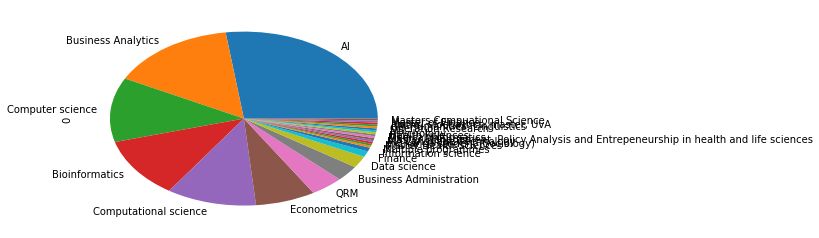

In [33]:
df[0].value_counts().plot(kind='pie') 

In [34]:
#df[0] in df[0].value_counts().index[:9]
bool_array = []

for i,name in enumerate(df[0]):
    if name in df[0].value_counts().index[:9]:
        bool_array.append(True)
    else:
        bool_array.append(False)
new_df = df.loc[bool_array]

print(len(new_df))
new_df


256


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Timestamp,,,,,,,,,,,,,,,,
2019-03-27 10:16:11,AI,yes,1,mu,ja,unknown,slim,unknown,3,no,100,6,23:00,sun,lecture,NaN
2019-04-01 15:58:21,AI,no,0,mu,ja,male,fat,09071992,1,no,0,7,3,DM,AI,1
2019-04-01 15:59:07,Computer science,yes,1,unknown,ja,male,neither,04/08/95,0,unknown,0,0,0,0,0,100
2019-04-01 15:59:30,Econometrics,yes,1,mu,ja,male,fat,29-09-1993,2,no,42,"1,645","0,3",Winning,Food,0
2019-04-01 15:59:58,Computer science,no,1,mu,ja,male,neither,0212,2,no,second,66,20,kiss,love,100
2019-04-01 16:00:01,AI,yes,1,mu,ja,male,unknown,31-12-1994,0,yes,Barkie,420,0000,Ganja,Sun,100
2019-04-01 16:00:12,Bioinformatics,yes,0,mu,nee,female,neither,09-10-1995,Many,no,100,739,22:00,chocolate,Sun,80
2019-04-01 16:00:16,Bioinformatics,yes,1,mu,ja,male,I have no idea what you are talking about,22/07/1996,0,yes,Don't so much,5,"24,3",Stay with my friends,Sun,50
2019-04-01 16:00:21,Computational science,no,0,mu,ja,male,neither,30-02-1945,0,no,0,31,03:30,Done something useful,Had fun,0


In [35]:
#Updating Stress level to floats
replace = ["..","epsilon","Over"]
new_df[15].value_counts()

l = []
bool_array = []
for i,number in enumerate(new_df[15]):
    if str(number) == "nan" or number == "Ten" or number == "Low" or number == "Epsilon":
        bool_array.append(False)
        continue
    print(number)
    for word in replace:
        num = number.replace(word,"")
    num = num.strip()
    num = num.replace(",",".")
    print(num)
    if num == "10^3" :
        num = 1000
    num = float(num)
    new_df[15][i] = num
    bool_array.append(True)
    l.append(num)
l

1
1
100
100
0
0
100
100
100
100
80
80
50
50
0
0


C:\Users\marvi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


80
80
150
150
20
20
10
10
16
16
50
50
10
10
0
0
17
17
40
40
20
20
12
12
2
2
63
63
0
0
0
0
98
98
20
20
10
10
3
3
5
5
22
22
0
0
40
40
80
80
60
60
-10
-10
0
0
20
20
110
110
60
60
15
15
30
30
25
25
33
33
10
10
Over 9000
9000
50
50
15
15
-50
-50
0
0
20
20
30
30
99,9
99.9
30
30
69
69
10
10
0
0
20
20
99
99
15
15
100
100
20
20
7
7
0
0
10
10
75
75
10
10
30
30
99
99
40
40
200
200
0
0
60
60
0
0
30
30
5
5
110
110
60
60
10
10
15
15
50
50
99
99
80
80
75
75
55
55
53
53
0
0
4
4
42
42
10
10
100
100
20
20
13
13
0
0
88
88
70
70
1
1
25
25
70
70
45
45
50
50
30
30
1
1
0
0
60
60
10
10
9
9
0
0
10
10
0
0
50
50
0
0
60
60
50
50
0
0
0
0
10
10
0
0
10
10
57
57
0
0
40
40
0
0
20
20
0,02
0.02
60
60
30
30
80
80
1
1
2
2
99
99
68
68
10
10
5
5
15
15
6
6
10
10
20
20
40
40
0
0
10
10
70
70
2
2
10
10
5
5
60
60
5
5
100
100
80
80
50
50
100
100
30
30
50
50
78
78
50
50
50
50
80
80
10
10
75
75
50
50
60
60
70
70
75
75
0
0
42
42
5
5
50
50
25
25
75
75
5
5
15
15
80
80
70
70
26
26
65
65
9001
9001
5
5
92
92
50
50
10
10
80
80
100
100
30


[1.0,
 100.0,
 0.0,
 100.0,
 100.0,
 80.0,
 50.0,
 0.0,
 80.0,
 150.0,
 20.0,
 10.0,
 16.0,
 50.0,
 10.0,
 0.0,
 17.0,
 40.0,
 20.0,
 12.0,
 2.0,
 63.0,
 0.0,
 0.0,
 98.0,
 20.0,
 10.0,
 3.0,
 5.0,
 22.0,
 0.0,
 40.0,
 80.0,
 60.0,
 -10.0,
 0.0,
 20.0,
 110.0,
 60.0,
 15.0,
 30.0,
 25.0,
 33.0,
 10.0,
 9000.0,
 50.0,
 15.0,
 -50.0,
 0.0,
 20.0,
 30.0,
 99.9,
 30.0,
 69.0,
 10.0,
 0.0,
 20.0,
 99.0,
 15.0,
 100.0,
 20.0,
 7.0,
 0.0,
 10.0,
 75.0,
 10.0,
 30.0,
 99.0,
 40.0,
 200.0,
 0.0,
 60.0,
 0.0,
 30.0,
 5.0,
 110.0,
 60.0,
 10.0,
 15.0,
 50.0,
 99.0,
 80.0,
 75.0,
 55.0,
 53.0,
 0.0,
 4.0,
 42.0,
 10.0,
 100.0,
 20.0,
 13.0,
 0.0,
 88.0,
 70.0,
 1.0,
 25.0,
 70.0,
 45.0,
 50.0,
 30.0,
 1.0,
 0.0,
 60.0,
 10.0,
 9.0,
 0.0,
 10.0,
 0.0,
 50.0,
 0.0,
 60.0,
 50.0,
 0.0,
 0.0,
 10.0,
 0.0,
 10.0,
 57.0,
 0.0,
 40.0,
 0.0,
 20.0,
 0.02,
 60.0,
 30.0,
 80.0,
 1.0,
 2.0,
 99.0,
 68.0,
 10.0,
 5.0,
 15.0,
 6.0,
 10.0,
 20.0,
 40.0,
 0.0,
 10.0,
 70.0,
 2.0,
 10.0,
 5.0,
 60.0,
 5.0,
 100.0

In [ ]:
new_df_3 = new_df.loc[bool_array]
new_df_3

In [62]:
#Opleiding
#pd.get_dummies(new_df[0]).values.tolist()

#Gender
pd.get_dummies(new_df[5]).values.tolist()

#Labels chocolate
labels = new_df_3[6]

train_dp = pd.concat([new_df_3[0], new_df_3[5],new_df_3[15]],axis=1)
feat_1 = pd.get_dummies(train_dp[0]).values.tolist()
feat_2 = pd.get_dummies(train_dp[5]).values.tolist()
feat_3 = train_dp[15].values
instances = []

for i in range(len(feat_1)):
    features = [feat_1[i],feat_2[i],feat_3[i]]
    instances.append(features)
    
clf = tree.DecisionTreeClassifier()
clf = clf.fit(instances[:150], labels[:150])
clf.predict(instances[151:])
#new_df_3[0].
#pd.get_dummies(new_df_3[0]).values.tolist()


ValueError: setting an array element with a sequence.